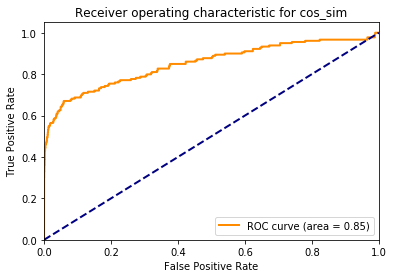

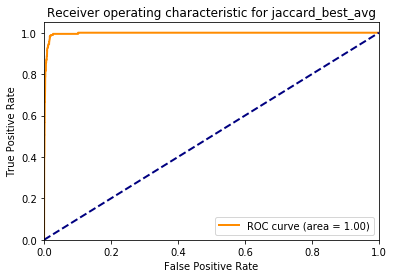

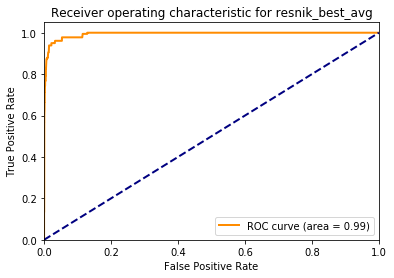

In [4]:
%matplotlib inline

import pickle
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

# fn = '../_data/patient_similarities/patient_similarities.pkl'
fn = '../_data/patients/decipher_patient_sims.pkl'

patient_similarities = load_object(fn)
# patient_similarities
    
fl = '../_data/patients/decipher_patients_disease.pkl'

patients_disease = load_object(fl)

y = []
cos_sim = []
jaccard_best_avg = []
resnik_best_avg = []

x = len(patient_similarities)
z = x-1
"""  Why is m = x*z / 2 instead of z*z/2  ??????
"""
m = x*z/2

def plot_results(sim_name, sim_array, m):
    if m != (len(sim_array)+1): return
    else:
        fpr, tpr, thresholds = roc_curve(y, sim_array)
        roc_auc = roc_auc_score(y, sim_array)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for {}'.format(sim))
        plt.legend(loc="lower right")
        plt.show()

def append_similarity_score(score_array, score_dict):
    for patient_compared in score_dict:
        score_array.append(score_dict[patient_compared])
    return score_array

for patient in patient_similarities:
    for sim in patient_similarities[patient]:
        if sim =='cos_sim':
            for patient_compared in patient_similarities[patient][sim]:
                cos_sim.append(patient_similarities[patient][sim][patient_compared])            
                if patients_disease[patient_compared] == patients_disease[patient]:
                    y.append(1)
                else:
                    y.append(0)
            plot_results(sim, cos_sim, m)
        if sim == 'jaccard_best_avg':
            jaccard_best_avg = append_similarity_score(jaccard_best_avg, patient_similarities[patient][sim])
            plot_results(sim, jaccard_best_avg, m)
        if sim == 'resnik_best_avg':
            resnik_best_avg = append_similarity_score(resnik_best_avg, patient_similarities[patient][sim]) 
            plot_results(sim, resnik_best_avg, m)